In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
top50=pd.read_csv(r'data/analysis/top50_charts_songs_2017-2020.csv')
top50.head()

,Position,Track Name,Artist,Streams,URL,filename,ID,date,country,group,...,energy,key,instrumentalness,liveness,loudness,mode,speechiness,valence,tempo,loud_start
0,1,Relación,Sech,76975,https://open.spotify.com/track/3ZG8N7aWw2meb6U...,2020-06-14-pe-regional.csv,3ZG8N7aWw2meb6UrI5ZmnZ,2020-06-14,pe,top50,...,0.562,7,0.000005,0.1480,-3.117,0,0.1050,0.767,172.094,-9.440
1,2,Favorito,Camilo,66376,https://open.spotify.com/track/0jT8Nl0shPS8115...,2020-06-14-pe-regional.csv,0jT8Nl0shPS8115is0wD2Q,2020-06-14,pe,top50,...,0.853,9,0.000000,0.2510,-2.975,1,0.0545,0.822,178.043,-11.308
2,3,Elegí (feat. Dímelo Flow),Rauw Alejandro,62295,https://open.spotify.com/track/50ZC4PM7hywH27R...,2020-06-14-pe-regional.csv,50ZC4PM7hywH27RcCfViau,2020-06-14,pe,top50,...,0.631,0,0.000116,0.0531,-2.791,1,0.0809,0.678,171.965,-12.833
3,4,Safaera,Bad Bunny,55988,https://open.spotify.com/track/2DEZmgHKAvm41k4...,2020-06-14-pe-regional.csv,2DEZmgHKAvm41k4J3R2E9Y,2020-06-14,pe,top50,...,0.829,2,0.000000,0.1070,-4.074,1,0.3790,0.685,96.172,-5.742
4,5,Tattoo,Rauw Alejandro,55254,https://open.spotify.com/track/7na7Bk98usp84Fa...,2020-06-14-pe-regional.csv,7na7Bk98usp84FaOJFPv3d,2020-06-14,pe,top50,...,0.617,9,0.000000,0.0625,-5.144,1,0.1820,0.745,193.896,-8.413


#### mapping country codes to  country names of geopandas

In [8]:
keys=list(sorted(set(top50.country)))
values=['Austria',
'Argentina',
'Belgium',
'Bulgaria',
'Brazil',
'Canada',
'Switzerland',
'Columbia',
'Costa Rica',
'Czech Republic',
'Germany',
'Denmark',
'Ecuador',
'Spain',
'Finland',
'France',
'United Kingdom',
'Greece',
'Iceland',
'Ireland',
'Italy',
'Mexico',
'Netherlands',
'Norway',
'Peru',
'Poland',
'Portugal',
'Rumania',
'Russia',
'Sweden',
'Turkey',
'United States of America']
country_dict = dict(zip(keys, values))
top50['country']=top50['country'].map(country_dict) 

#### Import geopandas geo locations

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world=world.rename(columns={'name':'country'})
world.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


#### Meger on country

In [11]:
top50_map=world.merge(top50, on='country', how='right')
top50_map.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,Position,Track Name,Artist,Streams,...,energy,key,instrumentalness,liveness,loudness,mode,speechiness,valence,tempo,loud_start
0,38476269.0,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",1,Relación,Sech,76975,...,0.562,7,0.000005,0.1480,-3.117,0,0.1050,0.767,172.094,-9.440
1,38476269.0,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",2,Favorito,Camilo,66376,...,0.853,9,0.000000,0.2510,-2.975,1,0.0545,0.822,178.043,-11.308
2,38476269.0,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",3,Elegí (feat. Dímelo Flow),Rauw Alejandro,62295,...,0.631,0,0.000116,0.0531,-2.791,1,0.0809,0.678,171.965,-12.833
3,38476269.0,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",4,Safaera,Bad Bunny,55988,...,0.829,2,0.000000,0.1070,-4.074,1,0.3790,0.685,96.172,-5.742
4,38476269.0,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",5,Tattoo,Rauw Alejandro,55254,...,0.617,9,0.000000,0.0625,-5.144,1,0.1820,0.745,193.896,-8.413


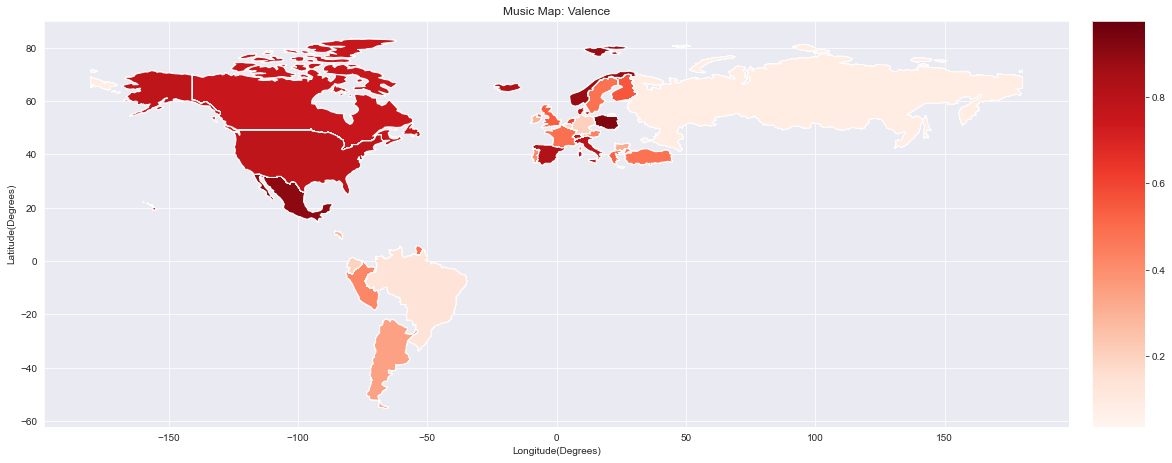

In [20]:
#mapping variables
from mpl_toolkits.axes_grid1 import make_axes_locatable #to adapt size of legend

fig, ax = plt.subplots(1,1,figsize=(20,15))
sns.set_style('darkgrid')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
top50_map.plot(ax=ax, column='valence',cmap='Reds',legend=True,cax=cax)
ax.set(xlabel='Longitude(Degrees)',ylabel='Latitude(Degrees)',title='Music Map: Valence')
plt.show()

want to print map for each feature in loop

In [ ]:
#viral_map[continuous_feat]
fig  = plt.subplots(10, figsize=(20,15), sharex=True, sharey=True)

for i in continuous_feat:
    
    #fig.suptitle('Aligning x-axis using sharex')
    
    ax1.plot(x, y)
    ax2.plot(x + 1, -y)
    
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    viral_map.plot(ax=ax, column='danceability',cmap='Blues',legend=True,cax=cax)
    ax.set(xlabel='Longitude(Degrees)',ylabel='Latitude(Degrees)',title='Viral Map: Danceability')

In [ ]:
#  Numerical Data
continuous_feat

#  plot Numerical Data
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in heart_NUM:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'chol', hue = 'sex')
    c = c + 1

plt.show()